In [1]:
import os
import numpy as np
import pandas as pd

DATA_PATH = os.path.join('CharRecog','Data','emnist')
def get_data(filename,path=DATA_PATH):
    file_path = path+filename
    df = pd.read_csv(file_path,header=None)
    data = df.iloc[:,1:]
    target = df.iloc[:,0]
    del df
    return target,data
    

In [2]:
print("Loading Traning Data ...")
train_label,train_data = get_data('/emnist-mnist-train.csv')
test_label,test_data = get_data('/emnist-mnist-test.csv')
print(train_label.head())
print(train_data.head())

Loading Traning Data ...
0    4
1    1
2    4
3    1
4    6
Name: 0, dtype: int64
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 784 columns]


In [3]:
train_label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: 0, dtype: int64

In [4]:
# The merged classes, as suggested by the NIST, are for the letters C, I, J, K, L, M, O, P, S, U,V, W, X, Y and Z
def getlabeldict(file,path = DATA_PATH):
    lbl_dict = {}
    with open(path+file) as f:
        for line in f.readlines():
            line = line.split(' ')
            lbl_dict[line[0]] = str(chr(int(line[1])))
    return lbl_dict


In [5]:
lbl_dict = getlabeldict('/emnist-mnist-mapping.txt')
print(lbl_dict.items())

dict_items([('0', '0'), ('1', '1'), ('2', '2'), ('3', '3'), ('4', '4'), ('5', '5'), ('6', '6'), ('7', '7'), ('8', '8'), ('9', '9')])


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 1 to 784
dtypes: int64(784)
memory usage: 59.8 MB


In [7]:
def rotate(image):
    image = image.reshape([28, 28])
    image = image = image.transpose()
    return image.reshape([28 * 28])
train_data = np.apply_along_axis(rotate,1,train_data)
test_data = np.apply_along_axis(rotate,1,test_data)

4


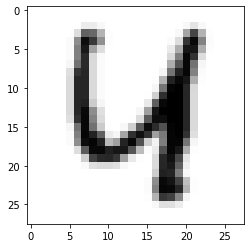

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def plotImage(n):
    print(lbl_dict[str(train_label.values[n])])
    image = train_data[n].reshape([28, 28])
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.show()
plotImage(12)

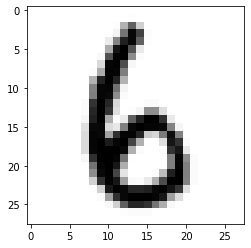

6


In [9]:
plt.imshow(test_data[32].reshape([28, 28]), cmap = mpl.cm.binary)
plt.show()
print(lbl_dict[str(test_label.values[32])])

In [10]:
y_train_5 = (train_label == 5)
y_test_5 = (test_label == 5)

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_data, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
# sgd_clf.predict(test_data[15])
for i in range(100):
    if sgd_clf.predict([train_data[i]]) == True:
        print(i)

10
16
18
23
32
35
41
42
43
88
94


In [13]:
sgd_clf.predict([train_data[10]])

array([ True])

5


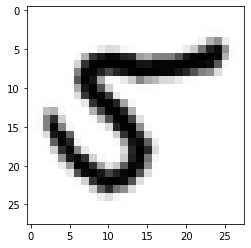

In [14]:
print(lbl_dict[str(train_label.values[10])])
plt.imshow(train_data[10].reshape([28, 28]), cmap = mpl.cm.binary)
plt.show()

In [15]:
# save the Model
from joblib import dump, load
MODEL_PATH = os.path.join('CharRecog','test','Model')
def saveModel(model,filename):
    dump(model, os.path.join(MODEL_PATH,filename+'.joblib')) # 'filename.joblib'

def loadModel(filename):
    return load(os.path.join(MODEL_PATH,filename+'.joblib')) # 'filename.joblib'
saveModel(sgd_clf,"Model_Linear_SGD_IS_FIVE")
sgd_model = None
sgd_clf = loadModel("Model_Linear_SGD_IS_FIVE")

FileNotFoundError: [Errno 2] No such file or directory: 'CharRecog\\test\\Model\\Model_Linear_SGD_IS_FIVE.joblib'

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_data, y_train_5, cv=3, scoring="accuracy")

array([0.9665 , 0.94625, 0.95325])

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, train_data, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52276,  1724],
       [  956,  5044]], dtype=int64)

In [19]:
y_train_pred[701]

False

In [20]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.7452718676122931
0.8406666666666667


In [21]:
y_scores = cross_val_predict(sgd_clf, train_data, y_train_5, cv=3,
                                 method="decision_function")

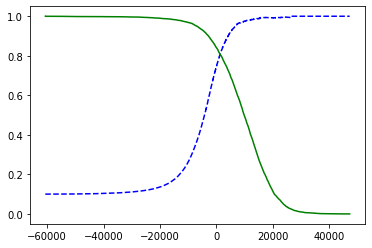

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

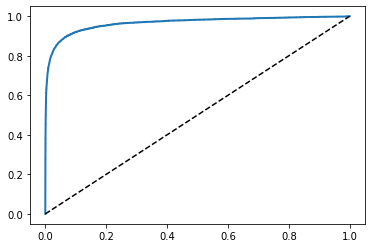

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

plot_roc_curve(fpr, tpr)
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, train_data, y_train_5, cv=3,method="predict_proba")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)


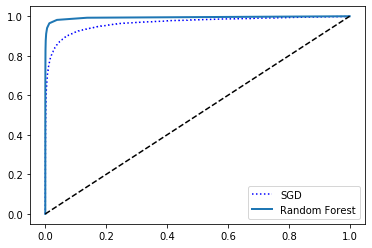

In [26]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
sgd_clf.fit(train_data, train_label)

In [ ]:
print(sgd_clf.predict([train_data[19]]))
sgd_clf.classes_

------------------------------------------------------------------------

In [9]:
mydict={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
mydict[0]

'0'